### Time series operation
In this tutorial, we learn to generate time series from excel

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir('C:/e-books/Practical-Time-Series-Analysis')

In [24]:
df = pd.read_excel('DataFiles/Monthly_CO2_Concentrations.xlsx',converters={'Year': np.int32, 'Month': np.int32})

In [25]:
df.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [26]:
#Create row index of the DataFrame from the Year and Month columns
df.index = df['Year'].astype(str) + '-' + df['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
df.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [31]:
df = df.loc[(~pd.isnull(df['CO2']))&\
                (~pd.isnull(df['Year']))&\
                (~pd.isnull(df['Month']))]

In [32]:
df.sort_values(['Year', 'Month'], inplace=True)

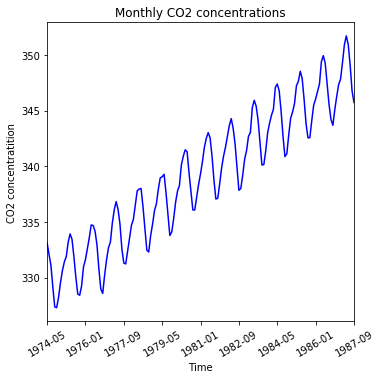

In [33]:
plt.figure(figsize=(5.5, 5.5))
df['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('B07887_01_05.png', format='png', dpi=300)

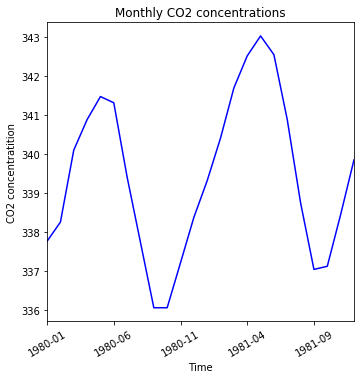

In [34]:
plt.figure(figsize=(5.5, 5.5))
df['CO2'].loc[(df['Year']==1980) | (df['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('B07887_01_06.png', format='png', dpi=300)

In [37]:
data.head()

,CO2,Year,Month,Residuals,Quarter
1974-05,333.13,1974,5,3.676894,Q2
1974-06,332.09,1974,6,2.515901,Q2
1974-07,331.10,1974,7,1.404908,Q3
1974-08,329.14,1974,8,-0.676085,Q3
1974-09,327.36,1974,9,-2.577078,Q3


In [36]:
df.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [40]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(df.shape[0]).reshape((-1,1)), df['CO2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_) )

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [46]:
df['Residuals'] = np.array(df['CO2']) - trend_model.predict(np.arange(df.shape[0]).reshape((-1,1)))
df['Residuals'].head()

1974-05    3.676894
1974-06    2.515901
1974-07    1.404908
1974-08   -0.676085
1974-09   -2.577078
Name: Residuals, dtype: float64

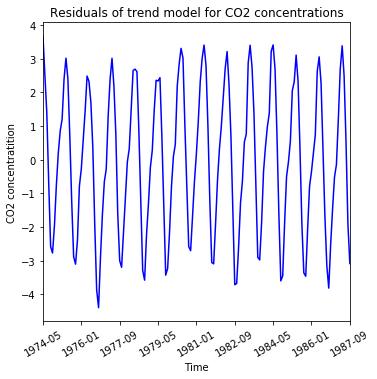

In [43]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=df.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('B07887_01_07.png', format='png', dpi=300)

In [44]:
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
df['Quarter'] = df['Month'].map(lambda m: month_quarter_map.get(m))

In [47]:
seasonal_sub_series_data = df.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [48]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


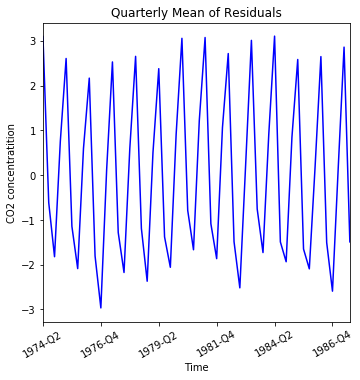

In [49]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('B07887_01_08.png', format='png', dpi=300)

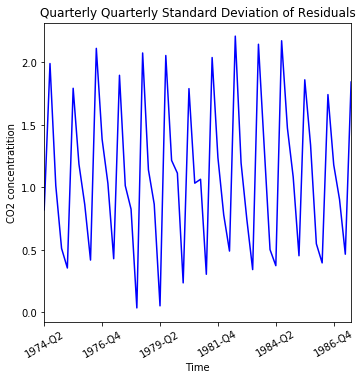

In [19]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('B07887_01_09.png', format='png', dpi=300)

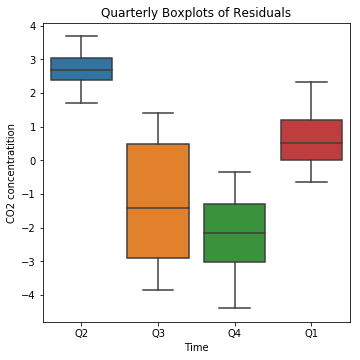

In [50]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=df, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
plt.savefig('B07887_01_10.png', format='png', dpi=300)

In [21]:
inflation = pd.read_excel('DataFiles/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [22]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


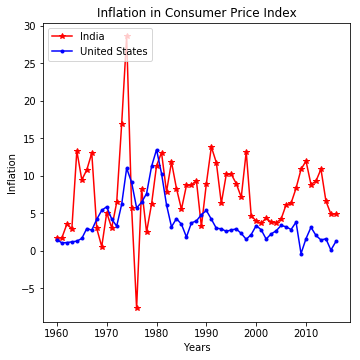

In [23]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
plt.savefig('B07887_01_11.png', format='png', dpi=300)